# Data Mining Techniques
This notebook demonstrates four data mining techniques on the finance dataset: clustering (K-Means), anomaly detection (Isolation Forest), classification and decision tree analysis.

## 1. Clustering with K-Means
We will use K-Means to group similar records in the dataset based on their numeric features.

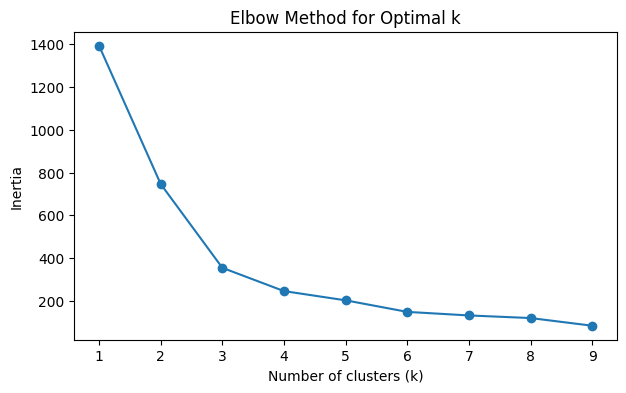

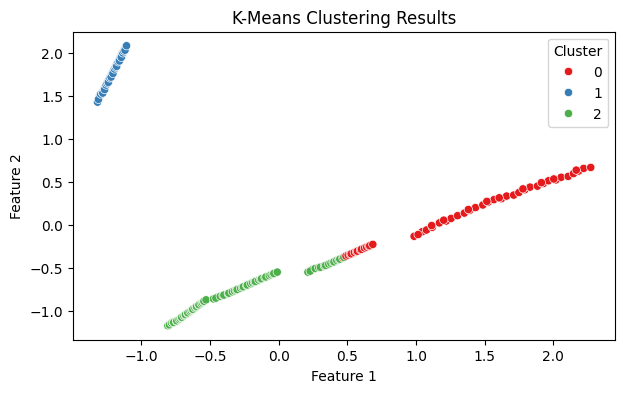

In [2]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned finance dataset
df = pd.read_csv('../data/transformed/Final/cleaned_finance_dataset.csv')

# Select numeric columns for clustering
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit KMeans with chosen k (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Visualize clusters using the first two features
plt.figure(figsize=(7,4))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters, palette='Set1')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

## 2. Anomaly Detection with Isolation Forest
We will use Isolation Forest to identify outliers in the dataset.

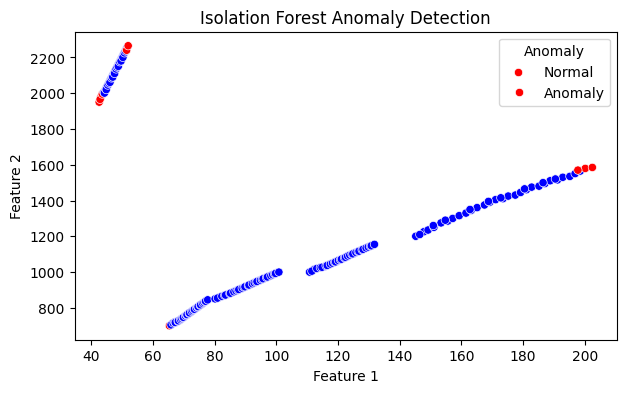

In [3]:
# Import Isolation Forest
from sklearn.ensemble import IsolationForest

# Use the same numeric features as before
# (Assume X and numeric_cols are already defined from previous cell)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels = iso_forest.fit_predict(X)

# Add anomaly labels to the dataframe (-1: anomaly, 1: normal)
df['Anomaly'] = anomaly_labels

# Visualize anomalies using the first two features
plt.figure(figsize=(7,4))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=df['Anomaly'], palette={1:'blue', -1:'red'})
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Anomaly', labels=['Normal','Anomaly'])
plt.show()

In [4]:
# Add anomaly labels to the dataset and save
import os
os.makedirs("../data/final", exist_ok=True)
df.to_csv("../data/final/with_clusters_anomalies.csv", index=False)
print("✅ Data with clusters and anomalies saved successfully.")


✅ Data with clusters and anomalies saved successfully.


# 3. Classification

Confusion Matrix:
[[ 8  0]
 [ 1 31]]

Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94         8
        True       1.00      0.97      0.98        32

    accuracy                           0.97        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.98      0.97      0.98        40



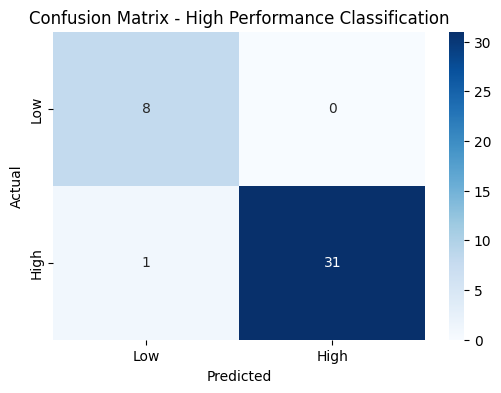

In [ ]:
# Create target column for classification
df['High_Performance'] = df['Profit_Margin'] > 13

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target
features = ['Stock_Price', 'Revenue_Millions', 'Net_Income_Millions',
            'Market_Cap_Billions', 'EPS', 'Profit_Margin', 'Revenue_Growth']
X_cls = df[features]
y_cls = df['High_Performance']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=50
)

# Train classifier
clf = DecisionTreeClassifier(random_state=50)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Text output
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Graph output - Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'],
            yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - High Performance Classification')
plt.show()


# 4. Decision Tree Analysis

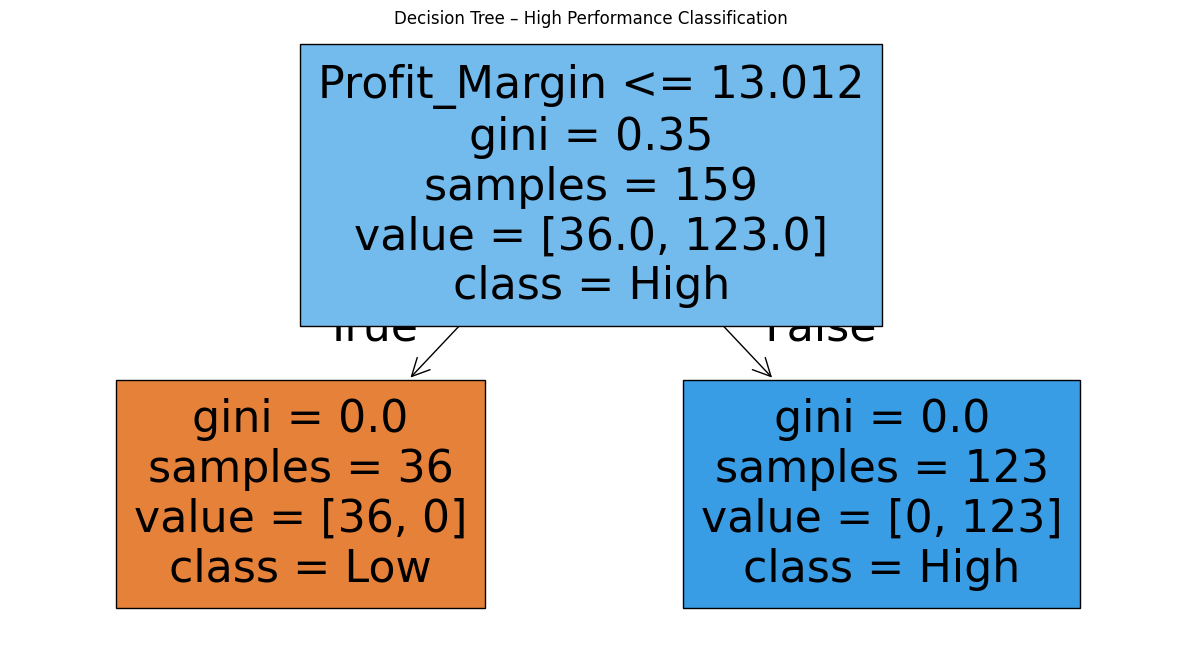

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(
    clf,
    feature_names=features,
    class_names=['Low', 'High'],
    filled=True
)
plt.title("Decision Tree – High Performance Classification")
plt.show()